In [1]:
import json
import csv
import pandas as pd
from collections import Counter
from surprise import Reader, Dataset, SVD, KNNBasic, BaselineOnly, NMF, accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib import cycler

In [ ]:
reviews = []
for line in open(r'C:\Users\Adis\Downloads\FileSplitter/yelp_academic_dataset_review_1.json', encoding="utf8"):
    reviews.append(json.loads(line))
    
reviews2 = []
for line in open(r'C:\Users\Adis\Downloads\FileSplitter/yelp_academic_dataset_review_2.json', encoding="utf8"):
    reviews2.append(json.loads(line))
    
reviews3 = []
for line in open(r'C:\Users\Adis\Downloads\FileSplitter/yelp_academic_dataset_review_3.json', encoding="utf8"):
    reviews3.append(json.loads(line))

In [4]:
businesses = []
for line in open(r'C:\Users\Adis\Downloads\yelp_dataset/yelp_academic_dataset_business.json', encoding="utf8"):
    businesses.append(json.loads(line))

In [96]:
photos = []
for line in open(r'C:\Users\Adis\Downloads\photos\yelp_photos\photos.json', encoding="utf8"):
    photos.append(json.loads(line))

In [5]:
categories = []
for b in businesses:
    if b['categories'] not in categories:
        categories.append(b['categories'])

withcategories = list(filter(lambda b: b['categories'] != None , businesses))
len(withcategories)

160470

In [7]:
print(len(businesses))
restaurants = list(filter(lambda b: 'food' in b['categories'].lower() or 'restaurant' in b['categories'].lower(), withcategories))
print(len(restaurants))
restaurants = list(filter(lambda b: b['review_count']>10, restaurants))
print(len(restaurants))
restaurants = list(filter(lambda b: b['city']=='Boston' , restaurants))
print(len(restaurants))

160585
63915
51573
3016


In [ ]:
restaurant_ids = [r['business_id'] for r in restaurants]

In [ ]:
restaurant_reviews = list(filter(lambda r: r['business_id'] in restaurant_ids, reviews))
print(len(restaurant_reviews))
restaurant_reviews2 = list(filter(lambda r: r['business_id'] in restaurant_ids, reviews2))
print(len(restaurant_reviews2))
restaurant_reviews3 = list(filter(lambda r: r['business_id'] in restaurant_ids, reviews3))
print(len(restaurant_reviews3))

In [ ]:
restaurant_reviews = restaurant_reviews+restaurant_reviews2+restaurant_reviews3
len(restaurant_reviews)

In [ ]:
cut = [(r['user_id'], r['business_id'], r['stars']) for r in restaurant_reviews]

In [ ]:
data_file_review = open(r'ReviewsBoston.csv', 'w', encoding="utf8", newline='')
fieldnames_review = ['user_id','business_id','stars']
csv_writer_review = csv.writer(data_file_review)
csv_writer_review.writerow(fieldnames_review)
for tup in cut:
    # Writing data of CSV file
    csv_writer_review.writerow(tup)
 
data_file_business.close()

In [90]:
data_file_business = open(r'business.csv', 'w', encoding="utf8", newline='')
fieldnames_business = ['business_id','name','address','city','latitude','longitude','stars','review_count','attributes','categories']
csv_writer_business = csv.writer(data_file_business)
csv_writer_business.writerow(fieldnames_business)
for b in businesses:
    # Writing data of CSV file
    csv_writer_business.writerow([b['business_id'],b['name'],b['address'],b['city'],b['latitude'],b['longitude'],str(b['stars']),b['review_count'],b['attributes'],b['categories']])
 
data_file_business.close()

In [93]:
photos[0]

{'business_id': 'R1sIqGfKpF5f3HV3vyNsbg',
 'caption': 'Drinks! Front is beer obviously. The pink one is the blackberry lemonade and the yellow one is the spicy margarita they made',
 'label': 'drink',
 'photo_id': 'Un_Og6jfhazVn7CxszkKEw'}

In [94]:
data_file_photo = open(r'photos.csv', 'w', encoding="utf8", newline='')
fieldnames_photo = ['photo_id','business_id','label','caption']
csv_writer_photo = csv.writer(data_file_photo)
csv_writer_photo.writerow(fieldnames_photo)
for p in photos:
    # Writing data of CSV file
    csv_writer_photo.writerow([p['photo_id'],p['business_id'],p['label'],p['caption']])
 
data_file_photo.close()

In [2]:
reviews = pd.read_csv('reviewsBoston.csv')
reviews.head()

,user_id,business_id,stars
0,Q8c91v7luItVB0cMFF_mRA,EXOsmAB1s71WePlQk0WZrA,2.0
1,99RsBrARhhx60UnAC4yDoA,EEHhKSxUvJkoPSzeGKkpVg,5.0
2,ffJp-ZN80M4sSkDL8Ra18w,WDGeeyeK7bG0cvq_ZglAdA,1.0
3,LfyHQWb_kFyxbdNFb8kQGA,UAtX7xmIfdd1W2Pebf6NWg,1.0
4,UKU5x7fgNWzzdpCh3PqS0A,jhFi0oxdyiyCYK7i-CW59A,4.0


In [3]:
len(reviews)

566398

In [5]:
users = reviews['user_id']
unique_users = list(set(users))
print(len(unique_users))

user_count = dict(Counter(users))

over10 = {x : user_count[x] for x in user_count if user_count[x] >= 10 }
print(len(over10))

users10 = list(over10)
ten_reviews = list(filter(lambda r: reviews['user_id'][r] in users10, range(0,len(reviews))))

print(len(ten_reviews))

211057
8197
177246


In [45]:
restaurants = reviews['business_id']
unique_restaurants = list(set(restaurants))
print(len(unique_restaurants))

restaurant_count = dict(Counter(restaurants))

over10_restaurants = {x : restaurant_count[x] for x in restaurant_count if restaurant_count[x] >= 10 }
print(len(over10_restaurants))

3016
3016


In [102]:
photos = pd.read_csv('photos.csv')
photos['label'].unique()

array(['drink', 'food', 'interior', 'outside', 'menu'], dtype=object)

In [114]:
labels = photos['label']
unique_labels = list(set(labels))

label_count = dict(Counter(labels))

In [117]:
label_count

{'drink': 40000,
 'food': 40000,
 'interior': 40000,
 'menu': 40000,
 'outside': 40000}

728


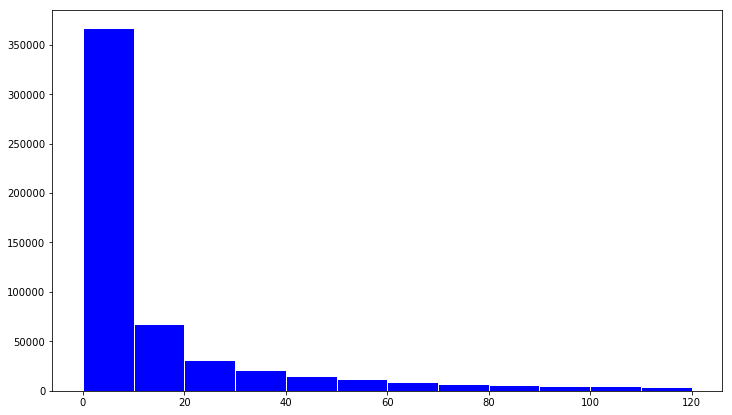

In [75]:
review_count = []
for u in users:
    review_count.append(user_count[u])
    
plt.rcParams['figure.figsize'] = [12, 7]
plt.hist(review_count,bins=[0,10,20,30,40,50,60,70,80,90,100,110,120],edgecolor='white', linewidth=1)
print(max(review_count))

In [72]:
review_count = []
for r in restaurants:
    review_count.append(restaurant_count[r])

7385


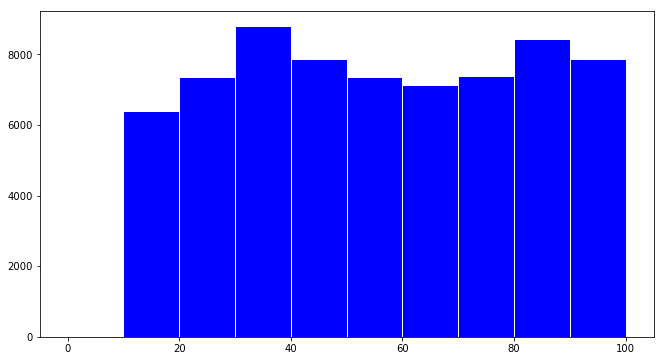

In [73]:
plt.rcParams['figure.figsize'] = [11, 6]
plt.hist(review_count,bins=[0,10,20,30,40,50,60,70,80,90,100],edgecolor='white', linewidth=1)
print(max(review_count))

7385


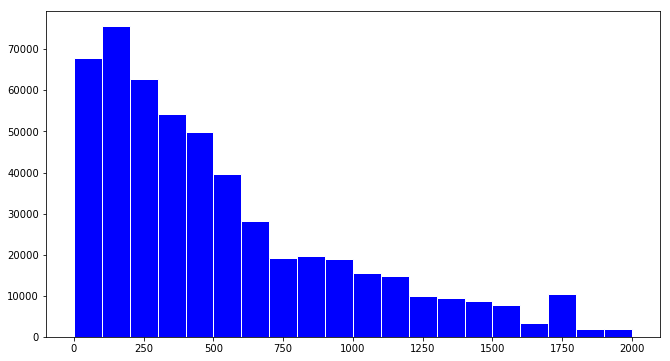

In [74]:
plt.rcParams['figure.figsize'] = [11, 6]
plt.hist(review_count,bins=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000],edgecolor='white', linewidth=1)
print(max(review_count))

(array([ 59335.,  55542.,  85302., 366219.]),
 array([1, 2, 3, 4, 5]),
 <a list of 4 Patch objects>)

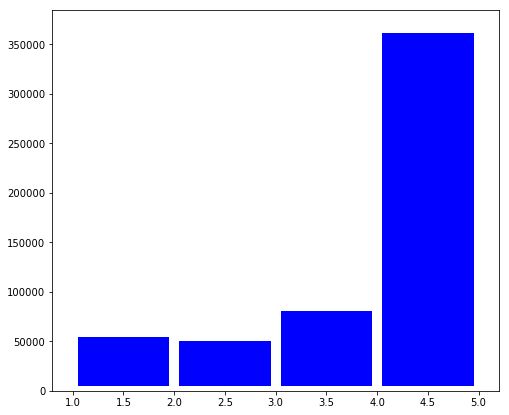

In [80]:
plt.rcParams['figure.figsize'] = [8, 7]
plt.hist(reviews['stars'],bins=[1,2,3,4,5],edgecolor='white', linewidth=10)

In [8]:
ten_reviews_df = reviews.iloc[ten_reviews]
print(len(ten_reviews_df))
ten_reviews_df.head()

177246


,user_id,business_id,stars
3,LfyHQWb_kFyxbdNFb8kQGA,UAtX7xmIfdd1W2Pebf6NWg,1.0
7,_qeS-wNr5HCs8cIxp1-BLQ,4mmKcjlUWF3NTjtgrmBMFQ,4.0
9,0DmuCPKJ5l4otcf5ar_sew,72PQGMhrEcIuWH-S44TprA,4.0
14,dUOZB3F9187M8UjbAxTAkQ,Oj5Seggqo_2FfKSjcAg7yw,3.0
15,K7DGRGHyyG1Cy-IsKJeP8Q,nzyu4lcjIOH_zPMlaPbmrw,4.0


In [81]:
ratings=ten_reviews_df

ratings_dict = {'itemID': list(ratings.business_id),
                'userID': list(ratings.user_id),
                'rating': list(ratings.stars)}

df = pd.DataFrame(ratings_dict)

In [82]:
reader = Reader(rating_scale=(0.0, 5.0))

data_original = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [83]:
#tuning biased
param_grid = {'biased': [True,False], 'lr_all': [0.005]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=4)

gs.fit(data_original)

results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.to_csv('results.csv')

results_df

,mean_fit_time,mean_test_mae,mean_test_rmse,mean_test_time,param_biased,param_lr_all,params,rank_test_mae,rank_test_rmse,split0_test_mae,...,split1_test_mae,split1_test_rmse,split2_test_mae,split2_test_rmse,split3_test_mae,split3_test_rmse,std_fit_time,std_test_mae,std_test_rmse,std_test_time
0,10.771829,0.789615,1.002596,0.452377,True,0.005,"{'lr_all': 0.005, 'biased': True}",1,1,0.786500,...,0.792628,1.005963,0.792969,1.007823,0.786364,0.998229,0.146487,0.003186,0.004348,0.053754
1,11.328597,0.928433,1.161599,0.413412,False,0.005,"{'lr_all': 0.005, 'biased': False}",2,2,0.925468,...,0.927431,1.158525,0.933621,1.170051,0.927210,1.159589,0.170348,0.003091,0.004906,0.057912


In [84]:
#tuning learning rate
param_grid = {'biased': [True], 'lr_all': [0.001,0.005,0.01]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=4)

gs.fit(data_original)

results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.to_csv('results.csv')

results_df

,mean_fit_time,mean_test_mae,mean_test_rmse,mean_test_time,param_biased,param_lr_all,params,rank_test_mae,rank_test_rmse,split0_test_mae,...,split1_test_mae,split1_test_rmse,split2_test_mae,split2_test_rmse,split3_test_mae,split3_test_rmse,std_fit_time,std_test_mae,std_test_rmse,std_test_time
0,11.656996,0.807833,1.019436,0.478378,True,0.001,"{'lr_all': 0.001, 'biased': True}",3,2,0.806247,...,0.805629,1.016285,0.808371,1.018902,0.811083,1.024709,0.188531,0.002134,0.003183,0.063880
1,11.511285,0.789713,1.002759,0.436782,True,0.005,"{'lr_all': 0.005, 'biased': True}",1,1,0.788711,...,0.788339,1.002517,0.788384,1.000079,0.793416,1.007473,0.521902,0.002143,0.002858,0.070474
2,11.181293,0.806493,1.030267,0.499093,True,0.010,"{'lr_all': 0.01, 'biased': True}",2,3,0.806841,...,0.805193,1.029422,0.804384,1.026439,0.809554,1.033824,0.221698,0.001977,0.002705,0.038766


In [85]:
#tuning learning rate
param_grid = {'biased': [True], 'lr_all': [0.004,0.006,0.008]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=4)

gs.fit(data_original)

results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.to_csv('results.csv')

results_df

,mean_fit_time,mean_test_mae,mean_test_rmse,mean_test_time,param_biased,param_lr_all,params,rank_test_mae,rank_test_rmse,split0_test_mae,...,split1_test_mae,split1_test_rmse,split2_test_mae,split2_test_rmse,split3_test_mae,split3_test_rmse,std_fit_time,std_test_mae,std_test_rmse,std_test_time
0,11.532697,0.789348,1.001163,0.554731,True,0.004,"{'lr_all': 0.004, 'biased': True}",1,1,0.790500,...,0.787480,0.998988,0.792672,1.004888,0.786738,0.998761,0.173237,0.002381,0.002505,0.061423
1,11.506467,0.793887,1.008541,0.484650,True,0.006,"{'lr_all': 0.006, 'biased': True}",2,2,0.795748,...,0.792210,1.007129,0.796632,1.011620,0.790959,1.005535,0.118091,0.002365,0.002361,0.074155
2,11.257950,0.800257,1.019294,0.461989,True,0.008,"{'lr_all': 0.008, 'biased': True}",3,3,0.801708,...,0.797401,1.015323,0.802754,1.022607,0.799165,1.018530,0.114607,0.002103,0.002709,0.059586


In [87]:
#tuning reguralization
param_grid = {'biased': [True], 'lr_all': [0.004], 'reg_all' : [0.05,0.1,0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=4)

gs.fit(data_original)

results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.to_csv('results.csv')

results_df

,mean_fit_time,mean_test_mae,mean_test_rmse,mean_test_time,param_biased,param_lr_all,param_reg_all,params,rank_test_mae,rank_test_rmse,...,split1_test_mae,split1_test_rmse,split2_test_mae,split2_test_rmse,split3_test_mae,split3_test_rmse,std_fit_time,std_test_mae,std_test_rmse,std_test_time
0,11.199602,0.786865,0.997799,0.468648,True,0.004,0.05,"{'lr_all': 0.004, 'reg_all': 0.05, 'biased': T...",2,3,...,0.782621,0.992255,0.786679,1.000793,0.788615,1.000121,0.216436,0.002659,0.003359,0.046864
1,10.755691,0.785796,0.995958,0.453013,True,0.004,0.10,"{'lr_all': 0.004, 'reg_all': 0.1, 'biased': True}",1,1,...,0.781666,0.990679,0.785995,0.999847,0.787453,0.997483,0.154139,0.002500,0.003367,0.063429
2,10.710359,0.787802,0.996667,0.425690,True,0.004,0.20,"{'lr_all': 0.004, 'reg_all': 0.2, 'biased': True}",3,2,...,0.783489,0.991352,0.787875,1.000149,0.789234,0.998132,0.128048,0.002671,0.003265,0.074434


In [ ]:
algo = SVD(lr_all=0.004,reg_all=0.1)
#evaluate(algo, data, measures=['RMSE'])
cross_validate(algo, data_original, measures=['RMSE','MAE'], cv=4, verbose=True, return_train_measures=True)

In [ ]:
data = data_original
algo = SVD()
trainset = data.build_full_trainset()
model= algo.fit(trainset)

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))